In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import optim
from torch import nn

In [2]:
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [3]:
train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(),
                                             download=True)


image, label = train_dataset[21]
print(image.size())
print(label)

Files already downloaded and verified
torch.Size([3, 32, 32])
59


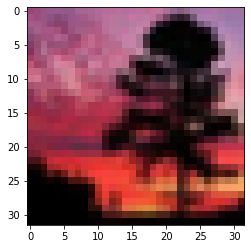

In [4]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=80, 
                                           shuffle=True)

In [6]:
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16,
                                          shuffle=False)

Files already downloaded and verified


In [7]:
classes = ('beaver', 'dolphin', 'otter', 'seal', 'whale',
         'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
         'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
         'bottles', 'bowls', 'cans', 'cups', 'plates',
         'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
         'clock', 'computer' , 'keyboard', 'lamp', 'telephone', 'television',
         'bed', 'chair', 'couch', 'table', 'wardrobe',
         'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
         'bear', 'leopard', 'lion', 'tiger', 'wolf',
         'bridge', 'castle', 'house', 'road', 'skyscraper',
         'cloud', 'forest', 'mountain', 'plain', 'sea',
         'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
         'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
         'crab', 'lobster', 'snail', 'spider', 'worm',
         'baby', 'boy', 'girl', 'man', 'woman',
         'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
         'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
         'maple', 'oak', 'palm', 'pine', 'willow',
         'bus', 'motorcycle', 'pickup truck', 'train',
         'rocket', 'streetcar', 'tank', 'tractor')

In [8]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        # добавили ещё два слоя
        self.fc1 = nn.Linear(input_dim, 3200)
        self.fc2 = nn.Linear(3200, 1600)
        self.fc3 = nn.Linear(1600, 800)
        self.fc4 = nn.Linear(800, 400)
        self.fc5 = nn.Linear(400, hidden_dim)
        self.fc6 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.fc1(x)   
        x = F.leaky_relu(x)
        
        x = self.fc2(x)
        x = F.leaky_relu(x)
        
        x = self.fc3(x)
        x = F.leaky_relu(x)
        
        x = self.fc4(x)
        x = F.leaky_relu(x)
        
        x = self.fc5(x)
        x = F.leaky_relu(x)
        
        x = self.fc6(x)
        return x                  
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.fc1(x)
        x = F.leaky_relu(x)
        
        x = self.fc2(x)
        x = F.leaky_relu(x)
        
        x = self.fc3(x)
        x = F.leaky_relu(x)
        
        x = self.fc4(x)
        x = F.leaky_relu(x)
        
        x = self.fc5(x)
        x = F.leaky_relu(x)
        
        x = self.fc6(x)
        x = F.softmax(x)        
        return x


net = Net(3072, 200, 100)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=3200, bias=True)
  (fc2): Linear(in_features=3200, out_features=1600, bias=True)
  (fc3): Linear(in_features=1600, out_features=800, bias=True)
  (fc4): Linear(in_features=800, out_features=400, bias=True)
  (fc5): Linear(in_features=400, out_features=200, bias=True)
  (fc6): Linear(in_features=200, out_features=100, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [10]:
num_epochs = 10 # добавили число эпох для обучения

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_items += len(labels)
        if i % 500 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/10]. Step [1/625]. Loss: 0.058
Epoch [1/10]. Step [501/625]. Loss: 0.058
Epoch [2/10]. Step [1/625]. Loss: 0.055
Epoch [2/10]. Step [501/625]. Loss: 0.053
Epoch [3/10]. Step [1/625]. Loss: 0.050
Epoch [3/10]. Step [501/625]. Loss: 0.050
Epoch [4/10]. Step [1/625]. Loss: 0.050
Epoch [4/10]. Step [501/625]. Loss: 0.049
Epoch [5/10]. Step [1/625]. Loss: 0.046
Epoch [5/10]. Step [501/625]. Loss: 0.047
Epoch [6/10]. Step [1/625]. Loss: 0.046
Epoch [6/10]. Step [501/625]. Loss: 0.046
Epoch [7/10]. Step [1/625]. Loss: 0.044
Epoch [7/10]. Step [501/625]. Loss: 0.044
Epoch [8/10]. Step [1/625]. Loss: 0.042
Epoch [8/10]. Step [501/625]. Loss: 0.043
Epoch [9/10]. Step [1/625]. Loss: 0.044
Epoch [9/10]. Step [501/625]. Loss: 0.042
Epoch [10/10]. Step [1/625]. Loss: 0.039
Epoch [10/10]. Step [501/625]. Loss: 0.042
Training is finished!


In [11]:
PATH_WEIGHTS = './weights.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [12]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param, "\t", net.state_dict()[param].size())

Model state_dict: 
fc1.weight 	 torch.Size([3200, 3072])
fc1.bias 	 torch.Size([3200])
fc2.weight 	 torch.Size([1600, 3200])
fc2.bias 	 torch.Size([1600])
fc3.weight 	 torch.Size([800, 1600])
fc3.bias 	 torch.Size([800])
fc4.weight 	 torch.Size([400, 800])
fc4.bias 	 torch.Size([400])
fc5.weight 	 torch.Size([200, 400])
fc5.bias 	 torch.Size([200])
fc6.weight 	 torch.Size([100, 200])
fc6.bias 	 torch.Size([100])


In [13]:
net = Net(3072, 200, 100)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=3072, out_features=3200, bias=True)
  (fc2): Linear(in_features=3200, out_features=1600, bias=True)
  (fc3): Linear(in_features=1600, out_features=800, bias=True)
  (fc4): Linear(in_features=800, out_features=400, bias=True)
  (fc5): Linear(in_features=400, out_features=200, bias=True)
  (fc6): Linear(in_features=200, out_features=100, bias=True)
)

In [14]:
PATH_MODEL = './model.pth'
torch.save(net, PATH_MODEL)

In [15]:
net = torch.load(PATH_MODEL)

In [16]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  road couch boy cloud baby motorcycle bottles tulips pears beaver baby woman hamster spider cockroach lion


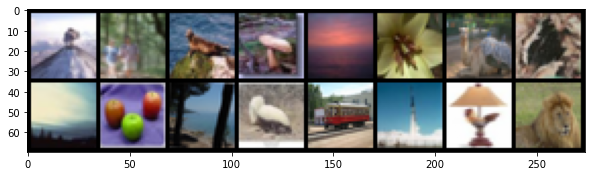

In [17]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [18]:
print(outputs)

tensor([[-6.0217e+00, -2.4132e+00,  5.7611e-01,  ..., -1.3139e+00,
         -1.8072e+00, -1.4760e+00],
        [-4.3972e+00, -2.4731e-01,  1.0073e+00,  ...,  3.0664e+00,
         -8.9577e-01,  1.1765e+00],
        [-1.4884e+00, -4.9046e-01, -2.3734e-01,  ..., -1.1052e-02,
         -2.7408e-01, -2.1282e+00],
        ...,
        [-3.6183e+00,  2.1589e+00, -1.3349e+00,  ...,  4.3419e-01,
         -2.1884e+00,  2.9210e+00],
        [-2.3676e-03, -3.2313e+00,  3.9597e+00,  ...,  2.8589e+00,
          4.4085e+00,  2.4447e+00],
        [-3.8569e-01, -1.7851e+00,  1.0031e+00,  ...,  5.0949e-01,
          1.5791e+00,  1.1724e+00]], grad_fn=<AddmmBackward0>)


In [19]:
net.predict(images)

C:\Users\Николай\AppData\Local\Temp\ipykernel_11888\1645672172.py:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([[4.3869e-06, 1.6193e-04, 3.2178e-03,  ..., 4.8613e-04, 2.9681e-04,
         4.1336e-04],
        [3.3398e-05, 2.1183e-03, 7.4280e-03,  ..., 5.8225e-02, 1.1076e-03,
         8.7976e-03],
        [1.4810e-03, 4.0176e-03, 5.1748e-03,  ..., 6.4889e-03, 4.9881e-03,
         7.8106e-04],
        ...,
        [4.3774e-06, 1.4134e-03, 4.2944e-05,  ..., 2.5188e-04, 1.8290e-05,
         3.0284e-03],
        [1.6470e-04, 6.5223e-06, 8.6581e-03,  ..., 2.8797e-03, 1.3562e-02,
         1.9031e-03],
        [3.0019e-03, 7.4067e-04, 1.2037e-02,  ..., 7.3479e-03, 2.1413e-02,
         1.4258e-02]], grad_fn=<SoftmaxBackward0>)

In [20]:
_, predicted = torch.max(outputs, 1)
predicted

tensor([12, 63, 17, 10, 92,  6, 63,  7, 71, 61,  1, 10, 89, 69, 28, 94])

In [21]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['road' 'couch' 'boy' 'cloud' 'baby' 'motorcycle' 'bottles' 'tulips'
 'pears' 'beaver' 'baby' 'woman' 'hamster' 'spider' 'cockroach' 'lion']
['roses' 'possum' 'cans' 'orchids' 'motorcycle' 'flatfish' 'possum' 'ray'
 'baby' 'fox' 'dolphin' 'orchids' 'pine' 'spider' 'lamp' 'train']
Accuracy is 0.0625


## ВЫВОДЫ

Несмотря на то что были увеличины количество эпох и добавлено дополнительных 
два слоя, к сожалению это не отразилось на качестве модели. Вероятно для распоз
навания нужны более мощные ресурсы исходя из самого качества обучаемого
материала.